# Problem 1

In [1]:
import pandas as pd
data = pd.read_csv('train.csv')

# Problem 2

This data set describing the sale of individual residential house in Ames, Iowa
from. The dataset contains 1460 observations and a large number of explanatory
variables involved in assessing home values. The main usage of this dataset is to predict the saleprice of a house given its feature.

# Problem 3

As can be derived from the overview of the dataset, the target variable in this dataset is the last column - 'SalePrice'. That is the main purpose of using this dataset is to predict the saleprice of residential house in Ames based on 80 explonatory variables.

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

After using method info() of panda dataframe, I can see an overview about each feature in the dataset:
 - There are 43 features whose type are objects in this dataset. These variables are all categorical variables which typically identify various types of dwellings, garages, materials, and environmental conditions of each house. 
 - The integer-type variables can be a nominal or continuos or discrete variable. A feature whose value range is continuous relate to various area dimensions for each observation. In addition to the typical lot size and total dwelling square footage found on most common home listings, other more specific variables are quantified in the data set. Discrete variables typically quantify the number of items occurring within the house. Most are specifically focused on the number of kitchens, bedrooms, and bathrooms located in the basement and above grade (ground) living areas of the home.
 - The remaining three float-type variable are all continuos variable

In [3]:
# Display the mean, standard deviation, and quartiles of the feature values at once.
pd.options.display.max_columns = None
print(data.describe())

                Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000

# Problem 4

In [4]:
# Compute the percentage of missing value in all column
percent = data.isnull().sum() * 100 /len(data)
percent_missing_frame = pd.DataFrame({'total' : len(data),
                                      'percent_missing': percent})
percent_missing_frame.sort_values('percent_missing',inplace=True)
print(percent_missing_frame)

               total  percent_missing
Id              1460         0.000000
TotalBsmtSF     1460         0.000000
Heating         1460         0.000000
SaleCondition   1460         0.000000
CentralAir      1460         0.000000
...              ...              ...
FireplaceQu     1460        47.260274
Fence           1460        80.753425
Alley           1460        93.767123
MiscFeature     1460        96.301370
PoolQC          1460        99.520548

[81 rows x 2 columns]


In [5]:
# Apply filter method of missingno library to filter out every column having less 
# than 5 missing values, then assign the result to the original dataset
import missingno as msno
data = msno.nullity_filter(data,filter='top',p=(5*100)/len(data))
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,Y,FuseA,1078,0,0,1078,1,0,1,0,2,1,Gd,5,Typ,0,NaN,Attchd,1950.0,Unf,1,240,TA,TA,Y,366,0,112,0,0,0,0,4,2010,WD,Normal,142125


In [6]:
# Delete all the rows which have any null value
data = data[data.isnull().sum(axis=1) == 0]
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000
6,7,20,RL,75.0,10084,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,0,8,2007,WD,Normal,307000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1447,1448,60,RL,80.0,10000,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,8,5,1995,1996,Gable,CompShg,VinylSd,VinylSd,BrkFace,438.0,Gd,TA,PConc,Gd,TA,No,GLQ,1079,Unf,0,141,1220,GasA,Ex,Y,SBrkr,1220,870,0,2090,1,0,2,1,3,1,Gd,8,Typ,1,TA,Attchd,1995.0,RFn,2,556,TA,TA,Y,0,65,0,0,0,0,0,12,2007,WD,Normal,240000
1451,1452,20,RL,78.0,9262,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2008,2009,Gable,CompShg,CemntBd,CmentBd,Stone,194.0,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,1573,1573,GasA,Ex,Y,SBrkr,1578,0,0,1578,0,0,2,0,3,1,Ex,7,Typ,1,Gd,Attchd,2008.0,Fin,3,840,TA,TA,Y,0,36,0,0,0,0,0,5,2009,New,Partial,287090
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,0,2,2010,WD,Normal,210000


# Problem 5

**Kurtosis**
***
 - **Kurtosis** is a statistical measure that defines how heavily the tails of a distribution differ from the tails of a normal distribution. In other words, **kurtosis** identifies whether the tails of a given distribution contain extreme values.
 - An **excess kurtosis** is a metric that compares the kurtosis of a distribution against the kurtosis of a normal distribution. The kurtosis of a normal distribution equals 3. Therefore, the excess kurtosis is found using the formula below:

$$ Excess Kurtosis = Kurtosis – 3$$
 - The types of kurtosis are determined by the excess kurtosis of a particular distribution. The excess kurtosis can take positive or negative values, as well as values close to zero
      - **Mesokurtic** has an excess kurtosis of zero or close to zero. This means that if the data follows a normal distribution, it follows a mesokurtic distribution.
      - **Leptokurtic** indicates a positive excess kurtosis. The leptokurtic distribution shows heavy tails on either side, indicating large outliers.
      - A **platykurtic** distribution shows a negative excess kurtosis. The kurtosis reveals a distribution with flat tails. The flat tails indicate the small outliers in a distribution



**Skewness**
***
 - **Skewness** refers to a distortion or asymmetry that deviates from the symmetrical bell curve, or normal distribution, in a dataset. If the curve is shifted to the left or to the right, it is said to be skewed. Skewness can be quantified as a representation of the extent to which a given distribution varies from a normal distribution.

 - Besides positive and negative skew, distributions can also be said to have zero or undefined skew. In the curve of a distribution, the data on the right side of the curve may taper differently from the data on the left side. These taperings are known as "tails." Negative skew refers to a longer or fatter tail on the left side of the distribution, while positive skew refers to a longer or fatter tail on the right.


 - The mean of positively skewed data will be greater than the median. In a distribution that is negatively skewed, the exact opposite is the case: the mean of negatively skewed data will be less than the median. If the data graphs symmetrically, the distribution has zero skewness, regardless of how long or fat the tails are.

# Problem 6

Kurtosis of the distribution of target variable is 4.794692928788333
Skewness of the distribution of target variable is 1.6886528434755144


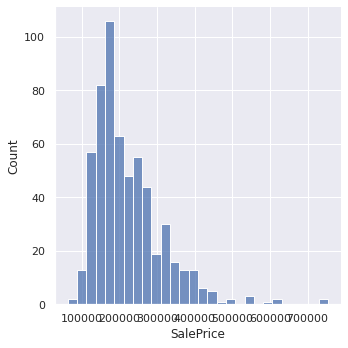

In [16]:
# Plot the distribution of SalePrice - the target variable
import seaborn as sns
sns.set_theme()
sns.displot(data['SalePrice'])

# Calculate the skewness and kurtosis of this distribution
kurtosis = data['SalePrice'].kurtosis()
skewness = data['SalePrice'].skew()
print('Kurtosis of the distribution of target variable is {}'.format(kurtosis))
print('Skewness of the distribution of target variable is {}'.format(skewness))

Kurtosis of the distribution of target variable after Log transformation is 0.1061636542415032
Skewness of the distribution of target variable after Log transformation is 0.37036563107827125


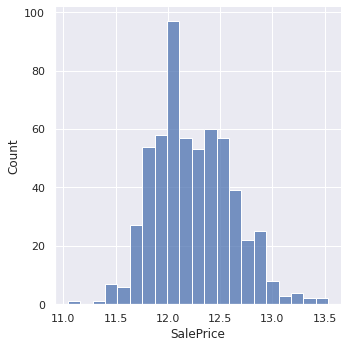

In [18]:
# Log transformation of target variable distribution
import numpy as np
target = data['SalePrice'].apply(np.log)
sns.displot(target)

# Calculate sknewness and kurtosis after transformation

trans_kurtosis = target.kurtosis()
trans_skewness = target.skew()

print('Kurtosis of the distribution of target variable after Log transformation is {}'.format(trans_kurtosis))
print('Skewness of the distribution of target variable after Log transformation is {}'.format(trans_skewness))

Before applying the transformation, the distribution of target variable is right-skewed having the skewness of 1.6885. After the applying the log transformation, the skewness of the distribution decreased to 0.37 indicating that the dataset is less skewed than before. Since the skewness after transformation is closer to zero which is the value of skewness for **normal distribution**, the distribution becomes more symmetric than before.

# Probem 7

<AxesSubplot:>

<Figure size 432x288 with 0 Axes>

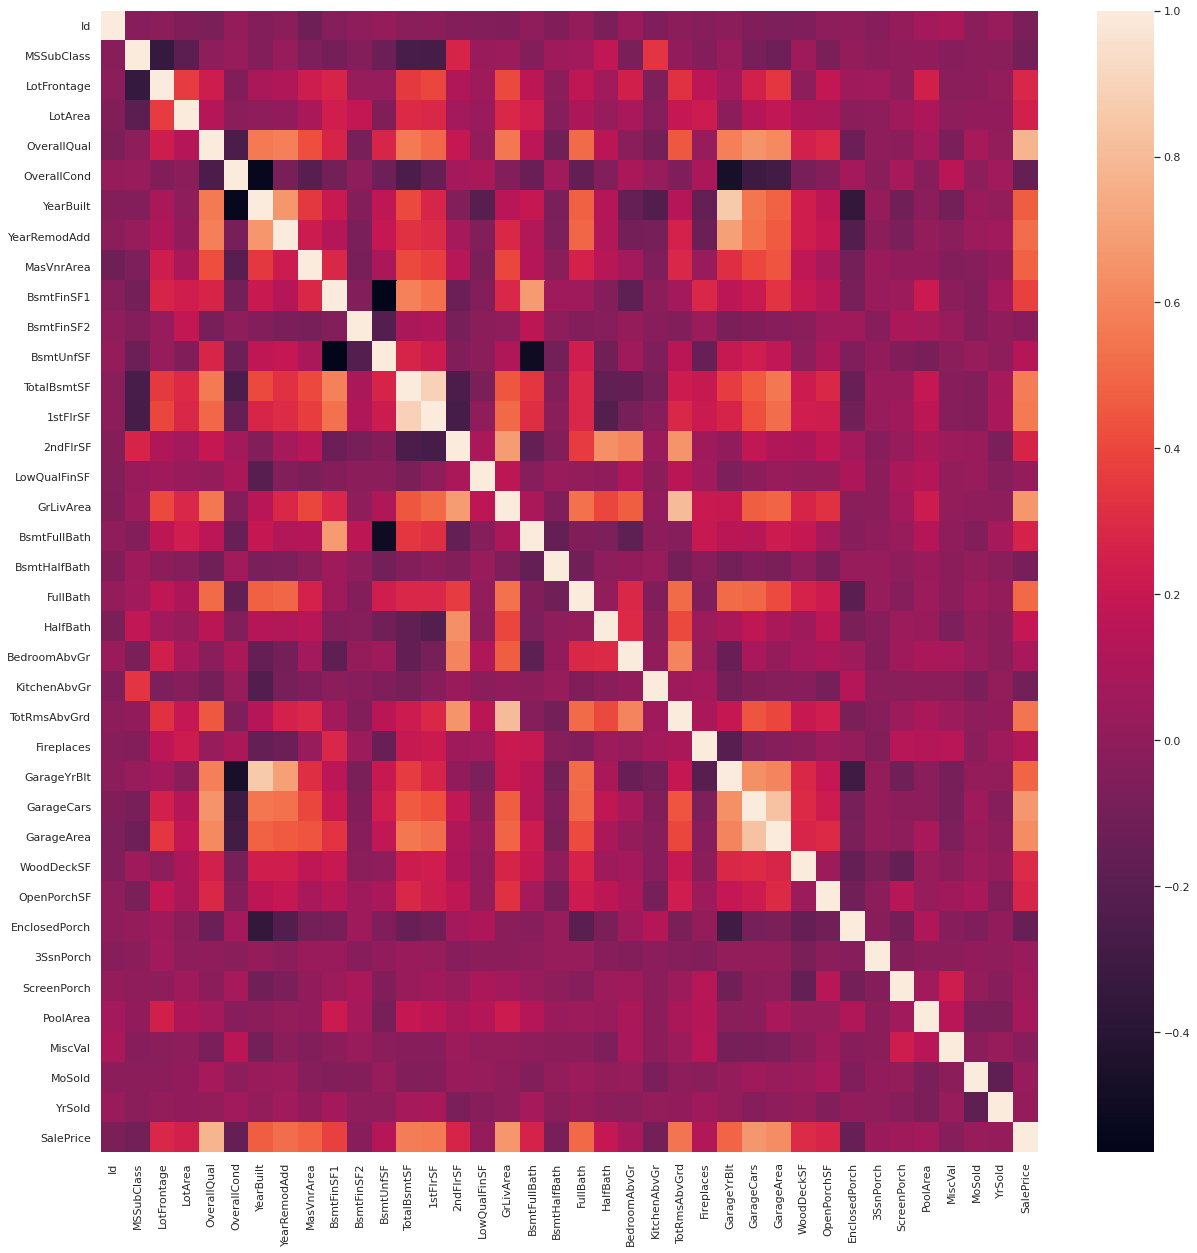

In [39]:
import matplotlib.pyplot as plt
cor = data.corr()
plt.tight_layout()
plt.figure(figsize=(21, 21))
sns.heatmap(cor)

According to this heat map of correlation matrix, all the features which hold strong relationships with target variable, in this case SalePrice have correlation coefficient with the SalePrice close to 1 or -1. If the correlation coefficient of a feature with the target variable is closer to 1, the realtionship is positively linear that is an increase in that variable leads to a rise in the target one. Meawhile, a value of correlation coefficient closer to -1 means the relationship is negatively linear. 

Select ten features which are highly correlated with the target variable and plot correlation coefficient heat map.

<AxesSubplot:>

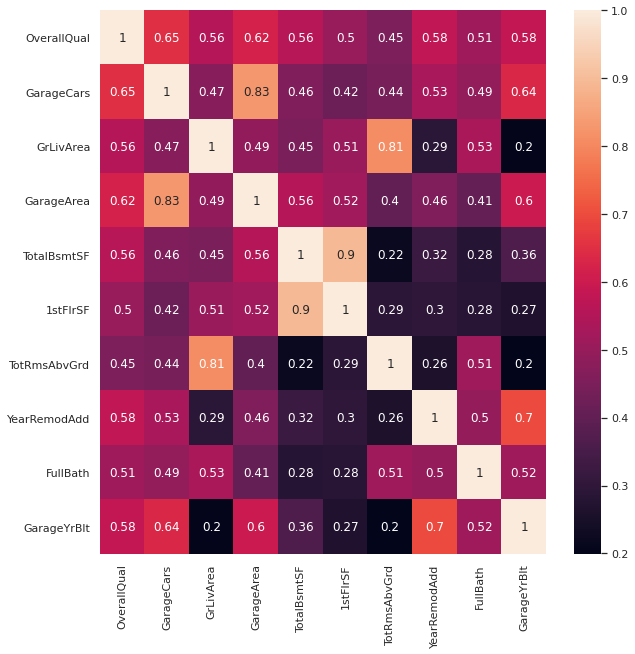

In [62]:
ten_feature = cor['SalePrice'].sort_values(key=abs,ascending=False)[1:11]
corr2 = data.loc[:,ten_feature.index].corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr2,annot=True)

According to the description of the dataset, below is the meaning of each feature:
- **OverallQual**: Rates the overall material and finish of the house
- **GarageCars**: Size of garage in car capacity
- **GrLivArea**: Above grade (ground) living area square feet
- **GarageArea**: Size of garage in square feet
- **TotalBsmtSF**: Total square feet of basement area
- **1stFlrSF**: First Floor square feet
- **TotRmsAbvGrd**: Total rooms above grade (does not include bathrooms)
- **YearRemodAdd**: Remodel date (same as construction date if no remodeling or additions)
- **FullBath**: Full bathrooms above grade
- **GarageYrBlt**: Year garage was built
***
Many of these features refer to the garage of the house regarding its capacity, area and when it was built. Also the area and capacity of the house above ground also affects the saleprice.

We can get 3 combinations of the 10 selected features that have high correlation coefficients with each other by sorting the array unstac

In [85]:
corr2.abs().unstack().sort_values(ascending=False)[10:16:2]

1stFlrSF    TotalBsmtSF     0.896029
GarageCars  GarageArea      0.830900
GrLivArea   TotRmsAbvGrd    0.809807
dtype: float64